In [ ]:
# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clarity Model



Class counts before filtering: clarity
Very Slightly Included    8333
Eye Clean                 2884
Slightly Included         1312
Included                    22
Name: count, dtype: int64
Classes with only one sample: Index([], dtype='object', name='clarity')
Class counts after resampling: clarity
Very Slightly Included    8333
Slightly Included         8333
Eye Clean                 8333
Included                  8333
Name: count, dtype: int64
Found 26665 validated image filenames belonging to 4 classes.
Found 6667 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 506s 604ms/step - accuracy: 0.4399 - loss: 1.1613 - val_accuracy: 0.5952 - val_loss: 0.7999 - learning_rate: 0.0010
Epoch 2/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 500s 600ms/step - accuracy: 0.5913 - loss: 0.8084 - val_accuracy: 0.6264 - val_loss: 0.7521 - learning_rate: 0.0010
Epoch 3/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 498s 597ms/step - accuracy: 0.6218 - loss: 0.7544 - val_accuracy: 0.6600 - val_loss: 0.6981 - learning_rate: 0.0010
Epoch 4/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 502s 601ms/step - accuracy: 0.6410 - loss: 0.7191 - val_accuracy: 0.6750 - val_loss: 0.6958 - learning_rate: 0.0010
Epoch 5/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 485s 582ms/step - accuracy: 0.6627 - loss: 0.6905 - val_accuracy: 0.7014 - val_loss: 0.6407 - learning_rate: 0.0010
Epoch 6/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 481s 577ms/step - accuracy: 0.6888 - loss: 0.6514 - val_accuracy: 0.7111 - val_loss: 0.6067 - learning_rate: 0.0010
Epoch 7/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 482s 578ms/step - accura

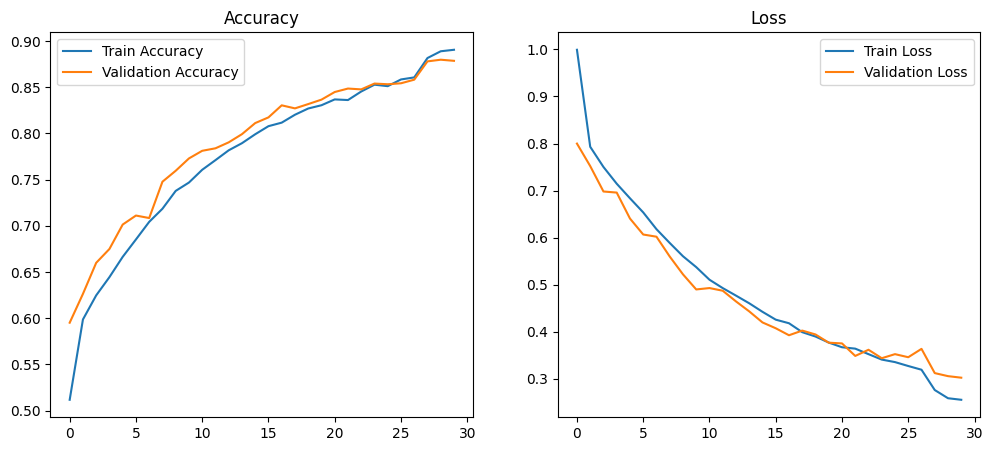

Found 6667 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


209/209 ━━━━━━━━━━━━━━━━━━━━ 80s 384ms/step


                        precision    recall  f1-score   support

             Eye Clean       0.83      0.80      0.82      1667
              Included       1.00      1.00      1.00      1666
     Slightly Included       0.89      0.97      0.93      1667
Very Slightly Included       0.77      0.73      0.75      1667

              accuracy                           0.88      6667
             macro avg       0.87      0.88      0.88      6667
          weighted avg       0.87      0.88      0.88      6667



In [ ]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

# ==========================
# ✅ Define Paths
# ==========================
csv_path = "/content/final trget variable clarity drop shape , cut, color intensity and other features.csv"  # Update with your CSV path
image_base_path = "/content/drive/MyDrive/Reupload_Images/"  # Folder containing images

# ==========================
# ✅ Load Dataset
# ==========================
df = pd.read_csv(csv_path)

# Convert image paths to absolute paths
df['Image id'] = df['Image id'].apply(lambda x: os.path.join(image_base_path, x))

# Ensure target variable is a string
df['clarity'] = df['clarity'].astype(str)

# ==========================
# ✅ Check for classes with only one sample
# ==========================
class_counts = df['clarity'].value_counts()
print("Class counts before filtering:", class_counts)

# Identify classes with only one sample
classes_with_one_sample = class_counts[class_counts == 1].index
print("Classes with only one sample:", classes_with_one_sample)

# Remove rows with classes having only one sample
df_filtered = df[~df['clarity'].isin(classes_with_one_sample)]

# ==========================
# ✅ Oversample Minority Classes
# ==========================
X = df_filtered['Image id'].values.reshape(-1, 1)
y = df_filtered['clarity'].values

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.DataFrame({'Image id': X_resampled.flatten(), 'clarity': y_resampled})

print("Class counts after resampling:", df_resampled['clarity'].value_counts())

# ==========================
# ✅ Train-Validation Split
# ==========================
train_df, val_df = train_test_split(df_resampled, test_size=0.2, random_state=42, stratify=df_resampled['clarity'])

# ==========================
# ✅ Define Augmentation (Adjusted for Clarity)
# ==========================
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    brightness_range=[0.8, 1.2],  # ✅ Adjusted augmentation (less geometric transformations)
    zoom_range=0.1,  # ✅ Reduced zoom to avoid distortion
    horizontal_flip=True,
    fill_mode="nearest"
)

# ==========================
# ✅ Image Data Generators
# ==========================
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# ==========================
# ✅ Define CNN Model
# ==========================
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(4, activation='softmax')  # ✅ Adjusted output layer for clarity (exactly 4 classes)
])

# ==========================
# ✅ Compile Model
# ==========================
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ==========================
# ✅ Define Callbacks
# ==========================
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# ==========================
# ✅ Train Model
# ==========================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)

# ==========================
# ✅ Plot Accuracy & Loss
# ==========================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

# ==========================
# ✅ Test Set Classification Report
# ==========================
test_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)

report = classification_report(true_labels, pred_labels, target_names=class_labels)
print(report)

# ✅ Save the entire model (architecture + weights)
model.save('clarity_classification_model01.h5')


# Model Testing Code

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os

# ==========================
# ✅ Load the Saved Model
# ==========================
model_path = "/content/clarity_classification_model01.h5"  # Update the path if needed
model = tf.keras.models.load_model(model_path)

# ==========================
# ✅ Define Image Preprocessing Function
# ==========================
def preprocess_image(image_path):
    """Loads and preprocesses an image for model prediction."""
    img = cv2.imread(image_path)  # Load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (128, 128))  # Resize to match training input size
    img = img / 255.0  # Rescale pixel values (same as training)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# ==========================
# ✅ Define Input Image Path
# ==========================
image_path = "/content/Blue Sapphire 11.jpg"  # Replace with your image path

# ==========================
# ✅ Preprocess Input Image
# ==========================
preprocessed_img = preprocess_image(image_path)

# ==========================
# ✅ Make Prediction
# ==========================
pred_probs = model.predict(preprocessed_img)
pred_label_index = np.argmax(pred_probs)  # Get class index

# ==========================
# ✅ Get Class Labels (Ensure Correct Order)
# ==========================
class_labels = ["Eye Clean", "Included", "Slightly Included", "Very Slightly Included"]


predicted_class = class_labels[pred_label_index]
confidence = pred_probs[0][pred_label_index] * 100  # Confidence percentage

# ==========================
# ✅ Display Prediction Result
# ==========================
print(f"Predicted Clarity: {predicted_class} (Confidence: {confidence:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicted Clarity: Eye Clean (Confidence: 50.66%)
